In [1]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [3]:
dataset = pd.read_csv("/kaggle/input/student-performance-bd/bd_students_per_v2.csv")

In [4]:
print("Dataset Preview:")
print(dataset.head())

Dataset Preview:
   id         full_name  age  gender location  family_size mother_education  \
0   2        Avi Biswas   16    Male    Urban            6              SSC   
1   3   Taslima Sultana   18  Female    Rural            6              SSC   
2   4  Md Adilur Rahman   15    Male    Rural            4              SSC   
3   5       Saleh Ahmed   16    Male    Rural            6              SSC   
4   6         Din Islam   17    Male    Urban            5           Honors   

  father_education mother_job father_job  ... tutoring school_type attendance  \
0              HSC         No         No  ...      Yes     Private         95   
1              HSC         No        Yes  ...       No   Semi_Govt         92   
2              SSC        Yes        Yes  ...      Yes        Govt         81   
3              SSC        Yes        Yes  ...      Yes     Private         90   
4          Masters         No        Yes  ...      Yes   Semi_Govt         75   

   extra_curricular_a

In [5]:
print("\nDataset Shape:", dataset.shape)


Dataset Shape: (8612, 24)


In [6]:
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
id                              0
full_name                       0
age                             0
gender                          0
location                        1
family_size                     0
mother_education               10
father_education                4
mother_job                      0
father_job                      0
guardian                        0
parental_involvement            0
internet_access                 0
studytime                       0
tutoring                        0
school_type                     0
attendance                      0
extra_curricular_activities     0
english                         0
math                            0
science                         0
social_science                  0
art_culture                     0
stu_group                       0
dtype: int64


In [7]:
df = pd.DataFrame(dataset)
df

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,8609,Elina Khanam,17,Female,City,5,HSC,Non_Educated,No,No,...,No,Govt,78,Yes,81,83,80,84,91,Science
8608,8610,Sadiq Ghosh,16,Male,City,2,SSC,Under_SSC,No,Yes,...,No,Private,73,No,95,100,96,98,98,Science
8609,8611,Arman Amin,18,Male,City,3,Diploma,SSC,No,No,...,Yes,Private,51,No,45,59,41,51,69,Arts
8610,8612,Tawhidul Saif,15,Male,Urban,5,Honors,HSC,No,No,...,No,Private,66,Yes,59,65,60,68,69,Arts


In [8]:
# Remove rows with missing values
df_cleaned = dataset.dropna()

In [9]:
# Verify no missing values remain
print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())


Missing Values After Cleaning:
id                             0
full_name                      0
age                            0
gender                         0
location                       0
family_size                    0
mother_education               0
father_education               0
mother_job                     0
father_job                     0
guardian                       0
parental_involvement           0
internet_access                0
studytime                      0
tutoring                       0
school_type                    0
attendance                     0
extra_curricular_activities    0
english                        0
math                           0
science                        0
social_science                 0
art_culture                    0
stu_group                      0
dtype: int64


In [10]:
df = df_cleaned

In [11]:
categorical_columns = ['gender', 'stu_group']

In [12]:
# One-Hot Encode categorical columns
df_pandas_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [13]:
print("\nEncoded Dataset Preview:")
print(df_pandas_encoded.head())


Encoded Dataset Preview:
   id         full_name  age location  family_size mother_education  \
0   2        Avi Biswas   16    Urban            6              SSC   
1   3   Taslima Sultana   18    Rural            6              SSC   
2   4  Md Adilur Rahman   15    Rural            4              SSC   
3   5       Saleh Ahmed   16    Rural            6              SSC   
4   6         Din Islam   17    Urban            5           Honors   

  father_education mother_job father_job guardian  ... attendance  \
0              HSC         No         No   Father  ...         95   
1              HSC         No        Yes   Father  ...         92   
2              SSC        Yes        Yes   Father  ...         81   
3              SSC        Yes        Yes   Father  ...         90   
4          Masters         No        Yes   Father  ...         75   

  extra_curricular_activities  english math science  social_science  \
0                         Yes       95   98      92          

In [14]:
# Apply Label Encoding to any remaining categorical or boolean columns
encoder = LabelEncoder()
df_encoded = df_pandas_encoded.apply(
    lambda col: encoder.fit_transform(col) if (col.dtype == 'object' or col.dtype == 'bool') else col
)

In [15]:
# Verify the encoded dataset
print("\nFully Encoded Dataset Preview:")
print(df_encoded.head())


Fully Encoded Dataset Preview:
   id  full_name  age  location  family_size  mother_education  \
0   2        602   16         2            6                 6   
1   3       6366   18         1            6                 6   
2   4       3563   15         1            4                 6   
3   5       5433   16         1            6                 6   
4   6       1142   17         2            5                 2   

   father_education  mother_job  father_job  guardian  ...  attendance  \
0                 1           0           0         0  ...          95   
1                 1           0           1         0  ...          92   
2                 6           1           1         0  ...          81   
3                 6           1           1         0  ...          90   
4                 4           0           1         0  ...          75   

   extra_curricular_activities  english  math  science  social_science  \
0                            1       95    98       

In [16]:
df_encoded# Display the data types of a sample column to confirm encoding
print("\nData Type of 'gender_Male':", df_pandas_encoded['gender_Male'].dtype)


Data Type of 'gender_Male': bool


In [17]:
# Select features for clustering
# 'parental_involvement' badd delm
features_for_clustering = [
    'location','father_job','internet_access','mother_job','studytime','extra_curricular_activities', 'tutoring', 'attendance', 
    'english', 'math', 'science', 
    'social_science', 'art_culture' 
]

In [18]:
X = df_encoded[features_for_clustering]

In [19]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Apply K-Medoids clustering with 3 clusters
kmedoids = KMedoids(n_clusters=3, random_state=42)
df_encoded['cluster'] = kmedoids.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


In [21]:
# Analyze and interpret the clusters (add your code here to understand the characteristics of each cluster)
# For example, you can calculate the mean of each feature within each cluster:

cluster_means = df_encoded.groupby('cluster').mean()
print(cluster_means)

                  id    full_name        age  location  family_size  \
cluster                                                               
0        4318.317472  3541.227752  16.593898  1.132946     4.521976   
1        4359.064023  3540.093489  16.596217  1.008730     4.466715   
2        4254.262189  3572.711334  16.647078  1.012270     4.511140   

         mother_education  father_education  mother_job  father_job  guardian  \
cluster                                                                         
0                3.521976          3.478024    0.696695    0.534326  0.969851   
1                3.529647          3.508185    0.476537    0.553292  0.970171   
2                3.494672          3.403939    0.289312    0.587988  0.899903   

         ...  attendance  extra_curricular_activities    english       math  \
cluster  ...                                                                  
0        ...   85.268071                     0.531057  87.507810  87.380312   
1

In [22]:
# # Visualize the clusters (optional - choose appropriate features for visualization)
# plt.scatter(df_encoded['math'], df_encoded['english'], c=df_encoded['cluster'])
# plt.xlabel('Math Score')
# plt.ylabel('English Score')
# plt.title('Student Clusters')
# plt.show()

In [23]:
def remove_outliers_after_clustering(df, kmedoids, threshold=1.5):
    """
    Removes outliers from a DataFrame after clustering based on distance to cluster centers.

    Args:
        df (pd.DataFrame): DataFrame with cluster assignments.
        kmedoids (KMedoids): Fitted KMedoids object.
        threshold (float): Standard deviation threshold for outlier detection.

    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """

    df['distance_to_center'] = np.min(kmedoids.transform(df[features_for_clustering]), axis=1)
    
    # Calculate mean and standard deviation of distances for each cluster
    cluster_stats = df.groupby('cluster')['distance_to_center'].agg(['mean', 'std'])

    # Identify outliers based on threshold
    df['outlier'] = False
    for cluster_id in range(kmedoids.n_clusters):
        mean_dist = cluster_stats.loc[cluster_id, 'mean']
        std_dist = cluster_stats.loc[cluster_id, 'std']
        df.loc[df['cluster'] == cluster_id, 'outlier'] = df.loc[df['cluster'] == cluster_id, 'distance_to_center'] > mean_dist + threshold * std_dist

    # Remove outliers
    df_filtered = df[df['outlier'] == False].copy()
    df_filtered.drop(['distance_to_center', 'outlier'], axis=1, inplace=True)
    return df_filtered

df_filtered = remove_outliers_after_clustering(df_encoded.copy(), kmedoids)

In [24]:
# Assign labels to clusters based on your analysis
cluster_labels = {
    0: 'Excellent', 
    1: 'Moderate', 
    2: 'At-Risk'  
}

In [25]:
# pca = PCA(n_components=2)  # Reduce to 2 dimensions
# X_pca = pca.fit_transform(X_scaled)

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_encoded['cluster'])
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('Clusters visualized with PCA')
# plt.show()

# X_filtered = df_filtered[features_for_clustering]

# # Standardize the features of the filtered DataFrame
# X_scaled_filtered = scaler.fit_transform(X_filtered)

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled_filtered)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_filtered['cluster'])  # Use df_filtered['cluster'] for colors
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('Clusters visualized with PCA (after outlier removal)')
# plt.show()

In [26]:
# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(X_scaled)

# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_encoded['cluster'])
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.title('Clusters visualized with t-SNE')
# plt.show()

# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(X_scaled_filtered)

# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_filtered['cluster'])
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.title('Clusters visualized with t-SNE After outlier Removal')
# plt.show()

In [27]:
# from sklearn.metrics import silhouette_score

# silhouette_avg = silhouette_score(X_scaled_filtered, df_filtered['cluster']) 
# print(f"Silhouette Score: {silhouette_avg}")

# inertia = kmedoids.inertia_
# print(f"Inertia: {inertia}")

# from sklearn.metrics import davies_bouldin_score

# db_index = davies_bouldin_score(X_scaled_filtered, df_filtered['cluster'])
# print(f"Davies-Bouldin Index: {db_index}")

# from sklearn.metrics import calinski_harabasz_score

# ch_index = calinski_harabasz_score(X_scaled_filtered, df_filtered['cluster'])
# print(f"Calinski-Harabasz Index: {ch_index}")

In [28]:
# Cluster assignments
labels = kmedoids.labels_

# Count points in each cluster
from collections import Counter
point_counts = Counter(labels)
print("Points in each cluster:", point_counts)

Points in each cluster: Counter({2: 3097, 0: 2753, 1: 2749})


In [29]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
df_encoded['cluster_label'] = df_encoded['cluster'].map(cluster_labels)
X_classification = df_encoded[features_for_clustering]
y_classification = df_encoded['cluster']

X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [30]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
Confusion Matrix:
[[660   0 146]
 [  0 824   9]
 [155   5 781]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       806
           1       0.99      0.99      0.99       833
           2       0.83      0.83      0.83       941

    accuracy                           0.88      2580
   macro avg       0.88      0.88      0.88      2580
weighted avg       0.88      0.88      0.88      2580



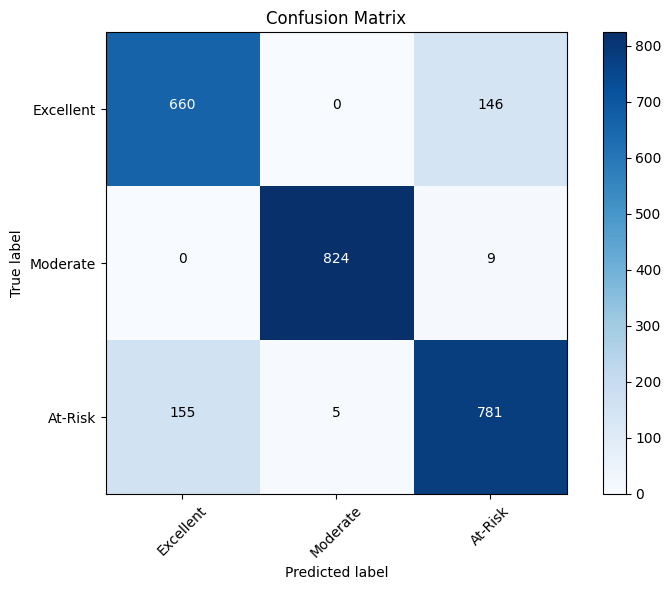

In [31]:
import itertools
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(cluster_labels))
plt.xticks(tick_marks, cluster_labels.values(), rotation=45)
plt.yticks(tick_marks, cluster_labels.values())

thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

df_filtered['cluster_label'] = df_filtered['cluster'].map(cluster_labels)
X_classification = df_filtered[features_for_clustering]
y_classification = df_filtered['cluster']

X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [33]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.91
Precision: 0.92
Recall: 0.91
F1 Score: 0.91
Confusion Matrix:
[[664   0 146]
 [  0 756   1]
 [ 48   9 754]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       810
           1       0.99      1.00      0.99       757
           2       0.84      0.93      0.88       811

    accuracy                           0.91      2378
   macro avg       0.92      0.92      0.92      2378
weighted avg       0.92      0.91      0.91      2378



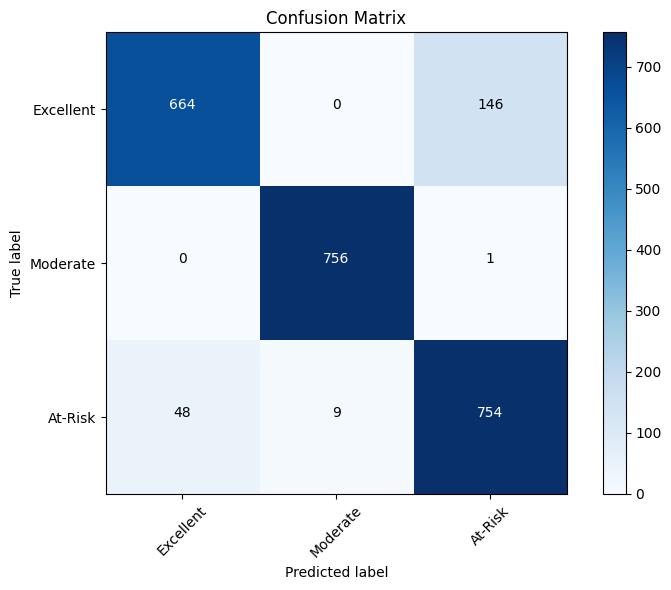

In [34]:
import itertools
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(cluster_labels))
plt.xticks(tick_marks, cluster_labels.values(), rotation=45)
plt.yticks(tick_marks, cluster_labels.values())

thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()